In [1]:
import pandas as pd

df = pd.read_csv('wines_SPA.csv')
print(df.describe())

            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000


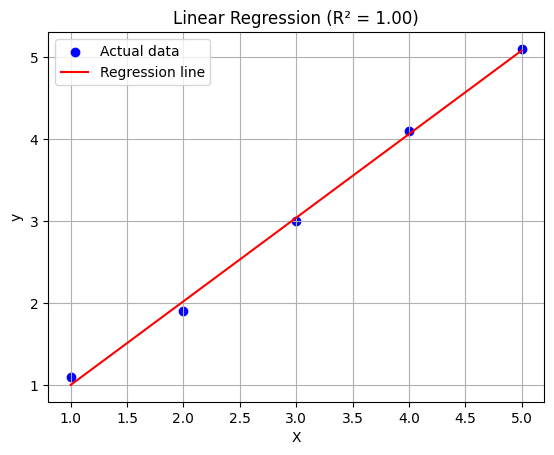

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1.1, 1.9, 3.0, 4.1, 5.1])

# Linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R2 score
r2 = r2_score(y, y_pred)

# Plot
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title(f'Linear Regression (R² = {r2:.2f})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


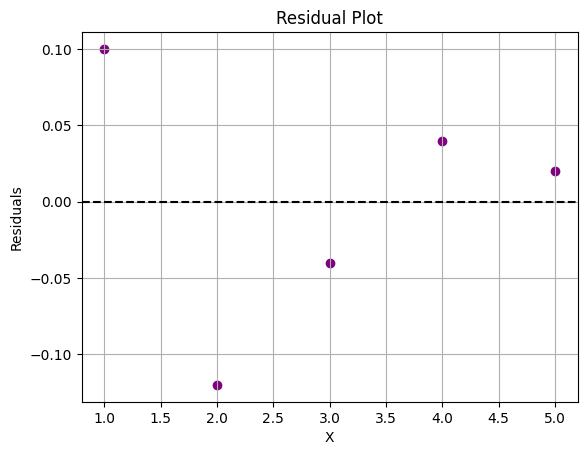

In [7]:
residuals = y - y_pred

plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()



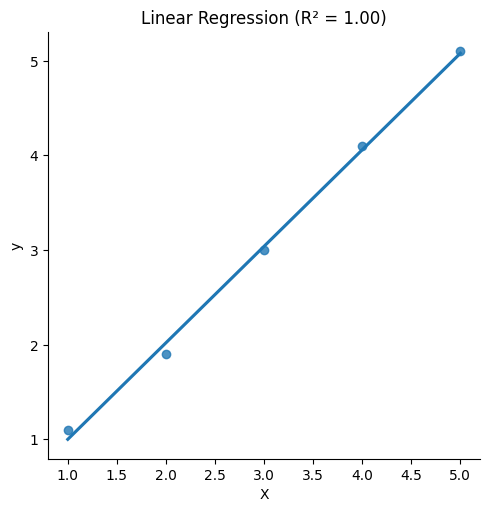

In [4]:
import seaborn as sns
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'X': X.flatten(), 'y': y})

# Plot with regression line
sns.lmplot(x='X', y='y', data=df, ci=None)
plt.title(f'Linear Regression (R² = {r2:.2f})')
plt.show()


In [ ]:
import numpy as np

def r2_score_manual(y, y_hat):
    y_mean = np.mean(y)
    ss_res = np.sum((y - y_hat)**2)
    ss_tot = np.sum((y - y_mean)**2)
    return 1 - (ss_res / ss_tot)


# residual sum of squares
# residual 


Residual sum of squares = Sum(y_i - y_hat_i)^2
Total Sum of Squares = Sum(y_i - y_mean)^2

y_i = actual 
y_i_hat = predicted
Y_mean = mean of actuals

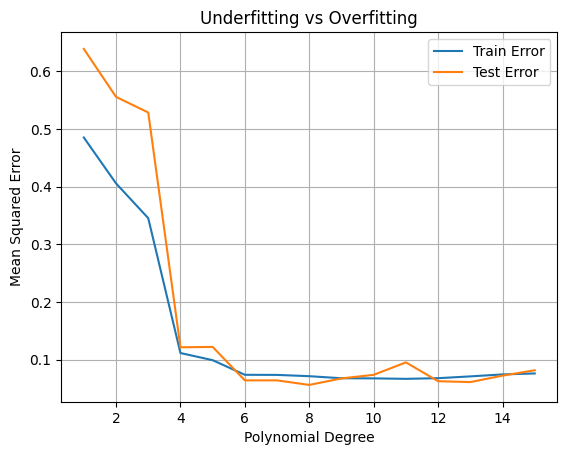

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic nonlinear data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_degree = 15
train_errors = []
test_errors = []

for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot train and test errors
plt.plot(range(1, max_degree + 1), train_errors, label='Train Error')
plt.plot(range(1, max_degree + 1), test_errors, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Underfitting vs Overfitting')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.linear_model import Ridge

degree = 10  # High degree to cause overfitting
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Without regularization
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_test_pred = model.predict(X_test_poly)
mse_no_reg = mean_squared_error(y_test, y_test_pred)

# With Ridge regularization
ridge = Ridge(alpha=1.0)  # alpha controls strength of regularization
ridge.fit(X_train_poly, y_train)
y_test_pred_ridge = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print(f"Test MSE without regularization: {mse_no_reg:.4f}")
print(f"Test MSE with Ridge regularization: {mse_ridge:.4f}")


Test MSE without regularization: 0.0736
Test MSE with Ridge regularization: 0.0625


/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.18758e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [11]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data (same as before)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])

# Split into train/test (optional, for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that does PolynomialFeatures + Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define parameter grid: degrees and alphas to try
param_grid = {
    'poly__degree': list(range(1, 16)),   # Polynomial degrees 1 to 15
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strengths
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best CV MSE:", -grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE with best model: {test_mse:.4f}")


Best parameters: {'poly__degree': 6, 'ridge__alpha': 0.1}
Best CV MSE: 0.08642741174682673
Test MSE with best model: 0.0648


/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.2311e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.03723e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.24749e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.65443e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_U

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Define pipeline: Polynomial features + Ridge
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),  # High degree to test overfitting
    ('ridge', Ridge())
])

# Define grid of alpha values
param_grid = {
    'ridge__alpha': np.logspace(-4, 4, 50)  # 50 values from 10^-4 to 10^4
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("Best CV MSE:", -grid_search.best_score_)


/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.68264e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.47391e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.88295e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.4546e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_U

Best alpha: 11.513953993264458
Best CV MSE: 0.08924300230397508


/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.4546e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.42718e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.72666e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Transform the input features with a polynomial basis
degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define alpha grid (log-spaced)
alphas = np.logspace(-4, 4, 50)

# RidgeCV with built-in cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # Add cv here instead of store_cv_values
ridge_cv.fit(X_train_poly, y_train)

# Best alpha found
print("Best alpha found by RidgeCV:", ridge_cv.alpha_)

# Evaluate on test set
y_test_pred = ridge_cv.predict(X_test_poly)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE with optimal alpha: {mse:.4f}")


Best alpha found by RidgeCV: 16.768329368110066
Test MSE with optimal alpha: 0.0702


/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.68264e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.47391e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.88295e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.4546e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/jenssegler/Documents/Code/ML_U